# Description & Objective:

* Dataset provides hourly bike rental numbers in Washington D.C. for the years 2011 and 2012. The objective is to explore the effect that different weather and temporal factors have on the number of bikes rented.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Dataset Import

In [2]:
dataset = pd.read_csv("../Dataset/train.csv")
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data Manipulation and Analysis

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Data Wrangling

In [5]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

dataset['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


* Creating new feature:

In [6]:
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month
dataset['day_of_week'] = dataset['datetime'].dt.day_of_week
dataset['hour'] = dataset['datetime'].dt.hour

dataset.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_of_week,hour
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218,2012,12,2,14
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237,2012,12,2,15
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334,2012,12,2,16
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562,2012,12,2,17
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569,2012,12,2,18
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,2,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,2,23


* Converting the season column:

In [7]:
dataset['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [8]:
dataset['season'] = ['spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter' for x in dataset['season']]

dataset['season'].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

* Converting weather column :

In [9]:
dataset['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [10]:
dataset['weather'] = [
    'Clear, Few clouds, Partly cloudy' if x==1
    else 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds' if x==2
    else 'Light Snow, Light Rain' if x==3
    else 'Heavy Rain, Snow'
    for x in dataset['weather']]

dataset['weather'].value_counts()

weather
Clear, Few clouds, Partly cloudy                          7192
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds    2834
Light Snow, Light Rain                                     859
Heavy Rain, Snow                                             1
Name: count, dtype: int64

* Null check

In [11]:
dataset.isna().sum()

datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
year           0
month          0
day_of_week    0
hour           0
dtype: int64

* Calculate the total number of casual and registered bikes rented in the years 2011 and 2012.

In [12]:
dataset[['casual', 'registered']][(dataset['year'] == 2011) | (dataset['year'] == 2012)].sum()

casual         392135
registered    1693341
dtype: int64

* Calculate the mean of the hourly total rentals count by season. Which season has the highest mean ?


In [13]:
dataset.groupby('season')[[ 'count']].mean()

,count
season,
fall,234.417124
spring,116.343261
summer,215.251372
winter,198.988296


<p> It seems that fall season is the highest.. </p> 

* Are more bikes rented by registered users on working or non-working days ? Does the answer differ for non-registered users ? Is the answer the same for both years ?

In [14]:
dataset.groupby(['workingday', 'year'])[['registered', 'casual']].sum()

registered  casual
workingday year                    
0          2011      167492   83099
           2012      281343  122938
1          2011      458670   72718
           2012      785836  113380

<p> For registed customers, we can say that on non-working days more bikes rented in 2011 and 2012. In contrast, for casuaş customers, we can not say same thing. </p>

*  Which months in the year 2011 have the highest and the lowest total number of bikes rented ? Repeat for the year 2012.

In [15]:
dataset[dataset['year'] == 2011].groupby(['month'])['count'].sum().idxmax()

7

<p> 2011 max </p>

In [16]:
dataset[dataset['year'] == 2011].groupby(['month'])['count'].sum().idxmin()

1

<p> 2011 min </p>

In [17]:
dataset[dataset['year'] == 2012].groupby(['month'])['count'].sum().idxmax()

9

<p> 2012 max</p>

In [18]:
dataset[dataset['year'] == 2012].groupby(['month'])['count'].sum().idxmin()

1

<p> 2012 min </p>

* Which type of weather have the highest and lowest mean of the hourly total rentals count ?

In [19]:
dataset.groupby('weather')[['count']].mean()

,count
weather,
"Clear, Few clouds, Partly cloudy",205.236791
"Heavy Rain, Snow",164.000000
"Light Snow, Light Rain",118.846333
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds",178.955540


<p> Highest mean for <b>Clear, Few clouds, Partly cloudy</b> </p>

<p> Lowest mean for <b>Light Snow, Light Rain</b> </p>

* Calculate the correlation between the hourly total rentals count and all the numerical columns in the dataset. Which column has the highest correlation with the total rentals count ?

In [20]:
dataset['workingday'] = dataset['workingday'].astype('bool')

In [21]:
dataset['holiday'] = dataset['holiday'].astype('bool')

In [22]:
dataset.select_dtypes(include=['int64', 'float64']).corr()['count'].drop('count').idxmax()

'registered'

* Create a new categorical column called day_period, which can take four possible values: night, morning, afternoon and evening. These values correspond to the following binning of the hour column: 0-6: night, 6-12: morning, 12-6: afternoon, 6-24:evening.

In [23]:
dataset['day_period'] = [
    'night' if (x>=0 and x<=6) else
    'morning' if (x>6 and x<=12) else
    'afternoon' if (x>12 and x<=18) else
    'evening'
    for x in dataset['hour']
]

* Generate a pivot table for the mean of the hourly total rentals count, with the index set to the day period and the column set to the working day column. What can you observe from the table ?

In [24]:
pivot_table = pd.pivot_table(
    dataset,
    values=['count'],
    index=['day_period', 'workingday'],
    aggfunc='mean',
)

pivot_table

count
day_period workingday            
afternoon  False       356.545977
           True        315.552519
evening    False       157.769655
           True        202.168489
morning    False       217.625287
           True        250.454594
night      False        40.594648
           True         28.786385

<p>
    When we look to the table, we can observe that bikes generally rent in afternoon and on non-working days. 
    On the other hand, we can also say that bikes rent at night and on working days infrequently.
</p>

# Data Visualisation

* Plot the distributions of all the numerical columns in the dataset using histograms.

In [25]:
num_cols = dataset.select_dtypes(['int', 'float']).columns

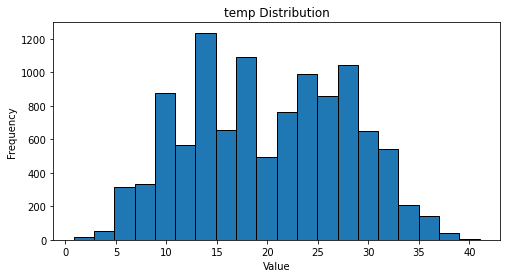

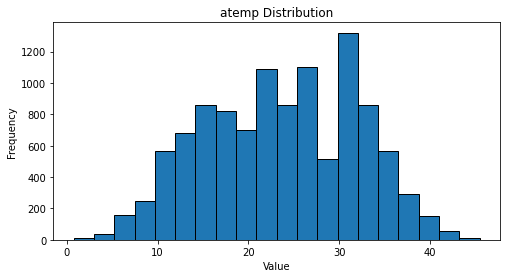

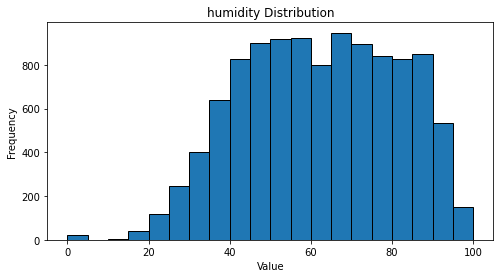

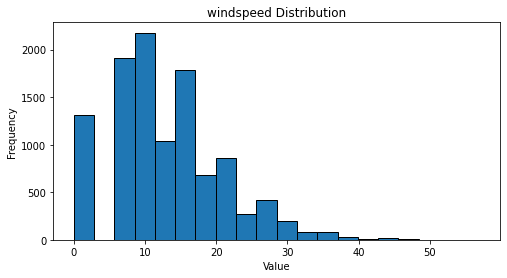

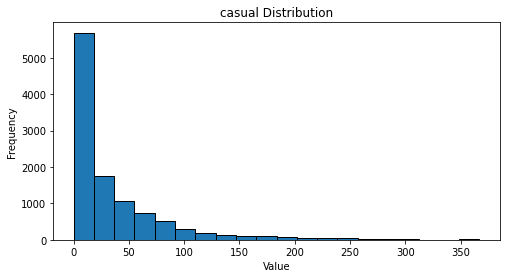

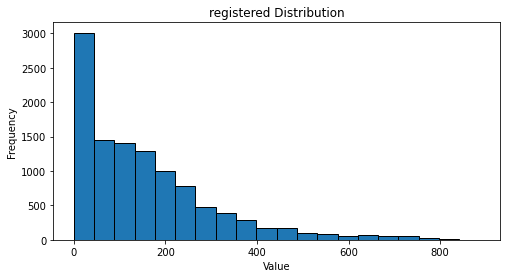

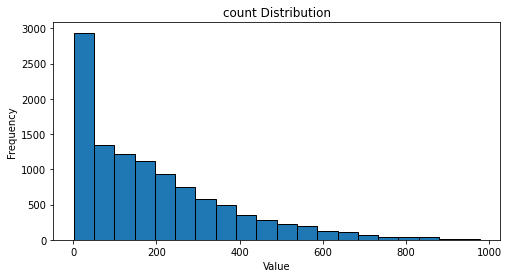

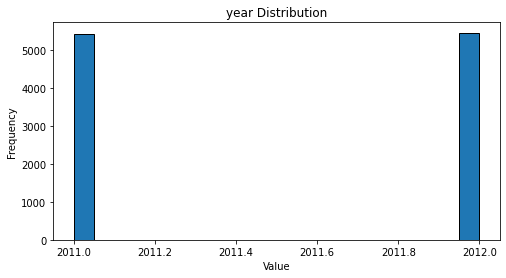

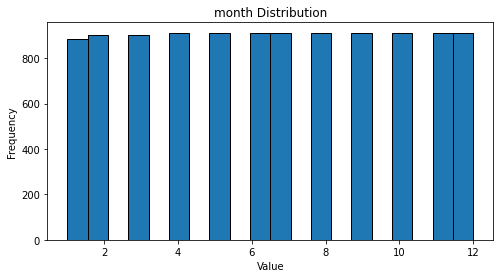

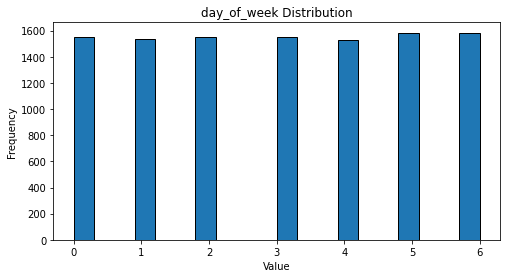

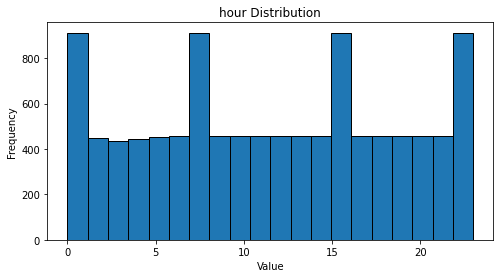

In [26]:
for column in num_cols:
    f, ax = plt.subplots(figsize=(8, 4))
    ax.hist(dataset[column], bins=20, edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

* Plot the distributions of all the numerical columns in the dataset using box plots.

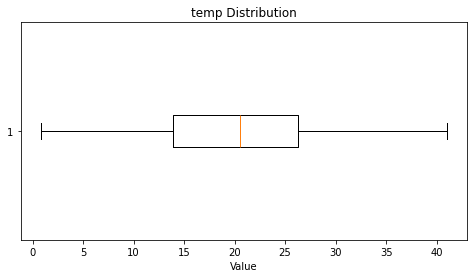

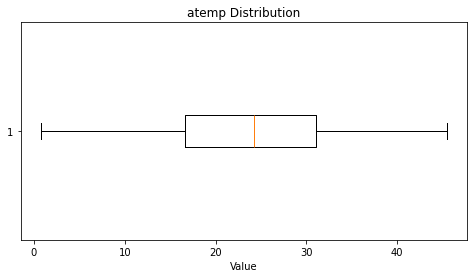

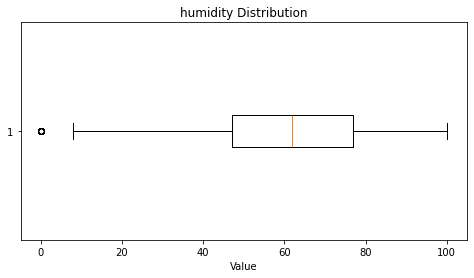

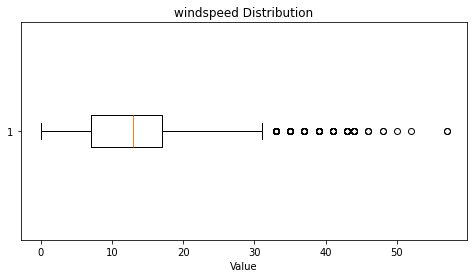

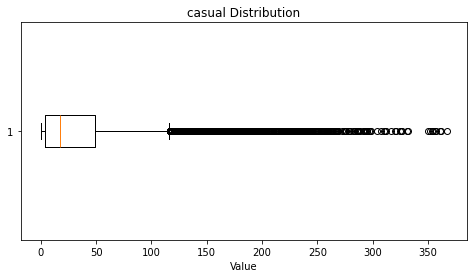

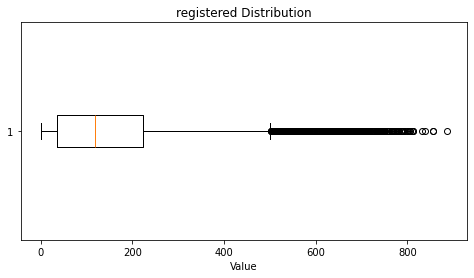

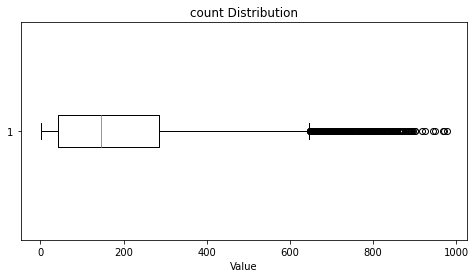

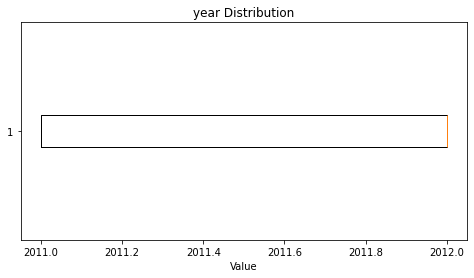

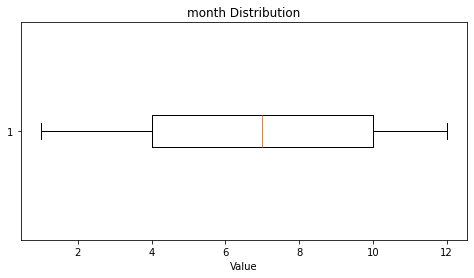

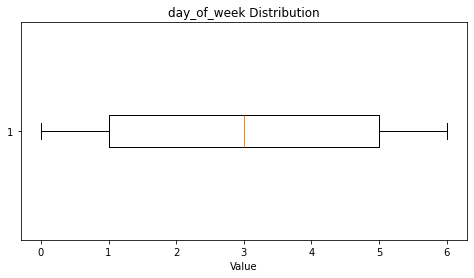

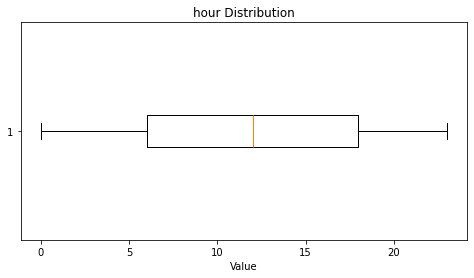

In [27]:
for column in num_cols:
    f, ax = plt.subplots(figsize=(8, 4))
    ax.boxplot(dataset[column], vert=False)
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel('Value')

* Plot the the mean of the hourly total rentals count for working and non-working days.

In [28]:
df = dataset.groupby('workingday')['count'].agg('mean').to_frame()
df

,count
workingday,
False,188.506621
True,193.011873


Text(0, 0.5, 'Mean Total Rentals')

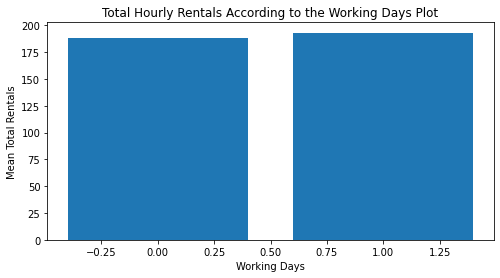

In [29]:
f, ax = plt.subplots(figsize=(8, 4))
ax.bar(x=df.index, height=df['count'])
ax.set_title("Total Hourly Rentals According to the Working Days Plot")
ax.set_xlabel("Working Days")
ax.set_ylabel("Mean Total Rentals")

* Plot the the mean of the hourly total rentals count for the different months for both years combined.

In [30]:
df = dataset.groupby(['month'])['count'].agg('mean').to_frame()
df

,count
month,
1,90.366516
2,110.003330
3,148.169811
4,184.160616
5,219.459430
6,242.031798
7,235.325658
8,234.118421
9,233.805281


Text(0, 0.5, 'Mean Total Rentals')

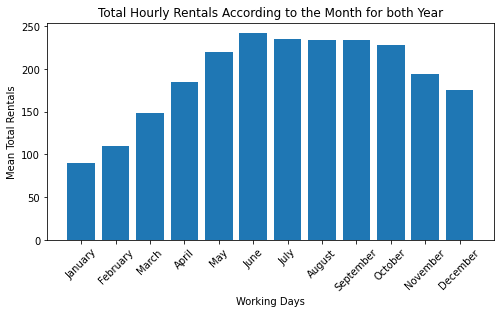

In [31]:
f, ax = plt.subplots(figsize=(8, 4))
ax.bar(x=df.index, height=df['count'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticks(df.index)
ax.set_xticklabels(months, rotation=45)
ax.set_title("Total Hourly Rentals According to the Month for both Year")
ax.set_xlabel("Working Days")
ax.set_ylabel("Mean Total Rentals")

* Plot the the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.

[Text(1, 0, 'January'),
 Text(2, 0, 'February'),
 Text(3, 0, 'March'),
 Text(4, 0, 'April'),
 Text(5, 0, 'May'),
 Text(6, 0, 'June'),
 Text(7, 0, 'July'),
 Text(8, 0, 'August'),
 Text(9, 0, 'September'),
 Text(10, 0, 'October'),
 Text(11, 0, 'November'),
 Text(12, 0, 'December')]

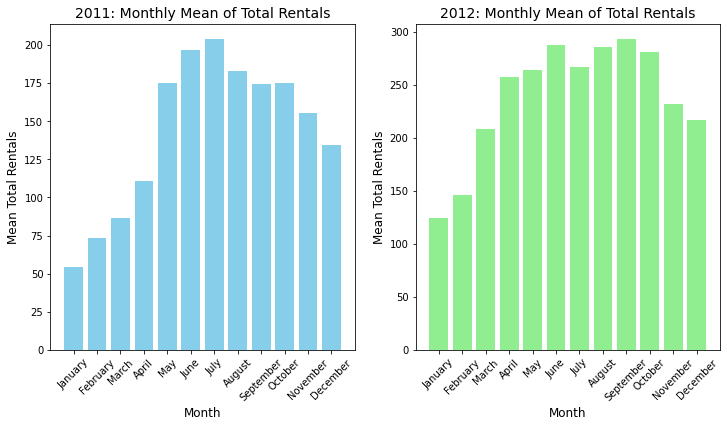

In [ ]:
df = dataset.groupby(['year', 'month'])['count'].agg('mean').to_frame()
df_2011 = df.loc[2011]
df_2012 = df.loc[2012]
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
# 2011
ax[0].bar(x=df_2011.index, height=df_2011['count'], color='skyblue')
ax[0].set_title('2011: Monthly Mean of Total Rentals')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Mean Total Rentals')
ax[0].set_xticks(range(1, 13))
ax[0].set_xticklabels(months, rotation=45)

# 2012
ax[1].bar(x=df_2012.index, height=df_2012['count'], color='lightgreen')
ax[1].set_title('2012: Monthly Mean of Total Rentals')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Mean Total Rentals')
ax[1].set_xticks(range(1, 13))
ax[1].set_xticklabels(months, rotation=45)

* Plot the the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories. What can you observe ?

In [33]:
ci_func = lambda x: 1.96 * x.std() / (len(x)**0.5)

df = dataset.groupby(['weather'])['count'].agg(mean='mean', ci=ci_func).reset_index()
df

,weather,mean,ci
0,"Clear, Few clouds, Partly cloudy",205.236791,4.344059
1,"Heavy Rain, Snow",164.000000,NaN
2,"Light Snow, Light Rain",118.846333,9.267532
3,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",178.955540,6.198857


([0, 1, 2],
 [Text(0, 0, 'Clear, Few clouds, Partly cloudy'),
  Text(1, 0, 'Light Snow, Light Rain'),
  Text(2, 0, 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds')])

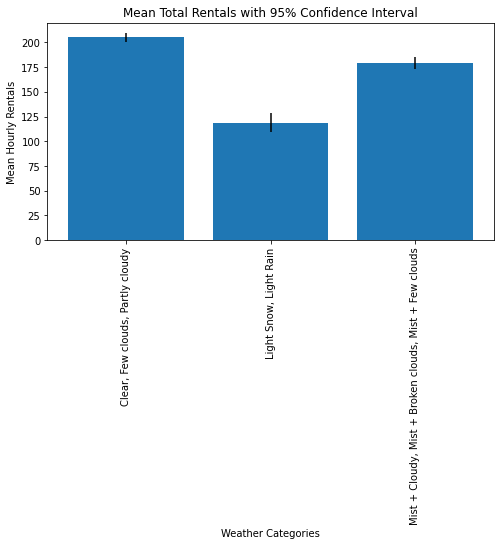

In [34]:
#Ignoring NaN value
df = df.dropna(subset=['ci'])

f, ax = plt.subplots(figsize=(8, 4))
ax.bar(x=df['weather'], height=df['mean'], yerr=df['ci'])
ax.set_title("Mean Total Rentals with 95% Confidence Interval")
ax.set_xlabel("Weather Categories")
ax.set_ylabel("Mean Hourly Rentals")
plt.xticks(rotation=90)


* Plot the the mean of the hourly total rentals count versus the hour of the day. Which hours of the day have the highest rentals count ?

In [35]:
dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day_of_week', 'hour', 'day_period'],
      dtype='object')

In [36]:
df = dataset.groupby(['hour'])['count'].agg('mean').to_frame()
df.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='hour')

Text(0, 0.5, 'Mean Total Rentals')

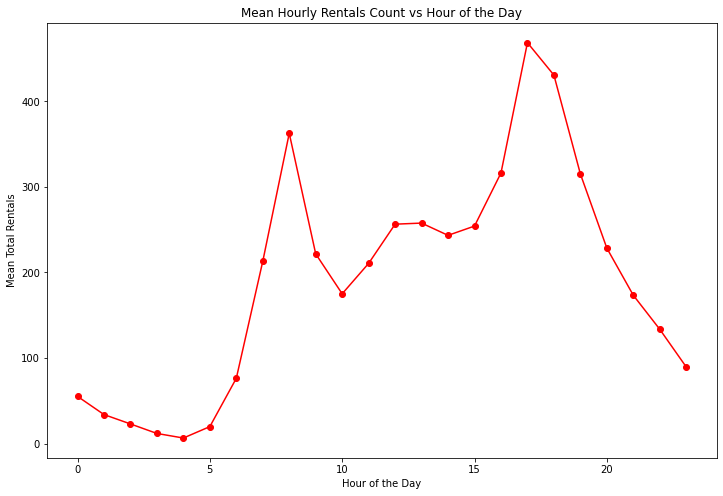

In [37]:
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.index, df['count'], marker='o', color='red')
ax.set_title("Mean Hourly Rentals Count vs Hour of the Day")
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Mean Total Rentals")

* Repeat the plot in 7 for different days of the week. What patterns can you observe ?

In [38]:
df_weekly = dataset.groupby(['day_of_week', 'hour'])['count'].mean().reset_index()
df_weekly

,day_of_week,hour,count
0,0,0,35.492308
1,0,1,18.076923
2,0,2,10.666667
3,0,3,5.677966
4,0,4,6.140625
...,...,...,...
163,6,19,227.257576
164,6,20,172.590909
165,6,21,131.939394
166,6,22,99.787879


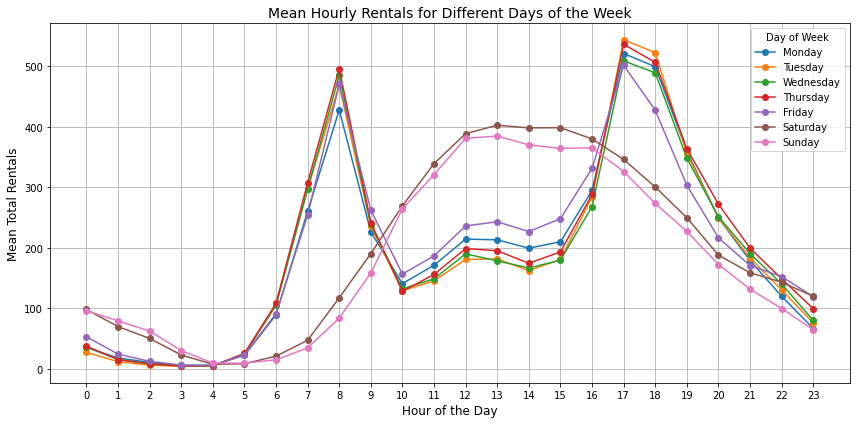

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(days):
    day_data = df_weekly[df_weekly['day_of_week'] == i]
    ax.plot(day_data['hour'], day_data['count'], marker='o', label=day)
ax.set_title("Mean Hourly Rentals for Different Days of the Week")
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Mean Total Rentals")
ax.legend(title="Day of Week")
plt.xticks(range(0, 24))
plt.grid()
plt.tight_layout()


* Repeat the plot in 8 for the four seasons using a multi-panel figure. What patterns can you observe ?

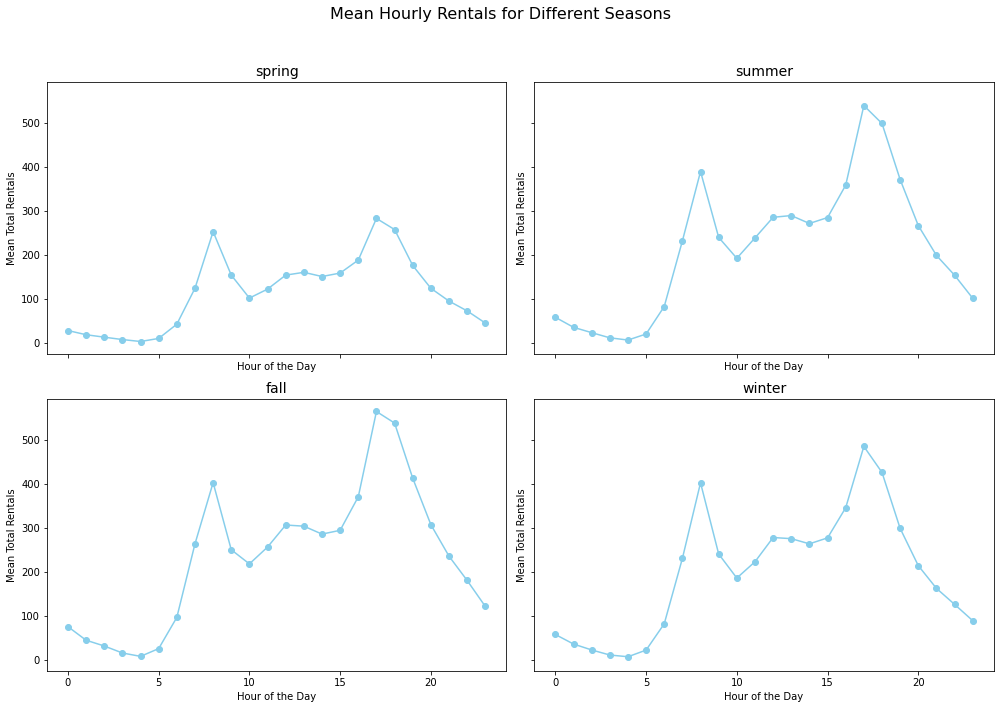

In [ ]:
df_seasonal = dataset.groupby(['season', 'hour'])['count'].mean().reset_index()

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)

for i, season in enumerate(dataset['season'].unique()):
    season_data = df_seasonal[df_seasonal['season'] == season]
    row, col = divmod(i, 2)
    ax[row, col].plot(season_data['hour'], season_data['count'], marker='o', color='skyblue')
    ax[row, col].set_title(season)
    ax[row, col].set_xlabel("Hour of the Day")
    ax[row, col].set_ylabel("Mean Total Rentals")


plt.suptitle("Mean Hourly Rentals for Different Seasons")
plt.tight_layout(rect=[0, 0, 1, 0.95])


* Plot the the mean and the 95% confidence interval of the hourly total rentals count versus the period of the day column, which you created in the first part of the assignment. Which period of the day has the highest rentals count ? Does this peak period differ for working and non-working days ?

Text(0.5, 0, 'Period of Day')

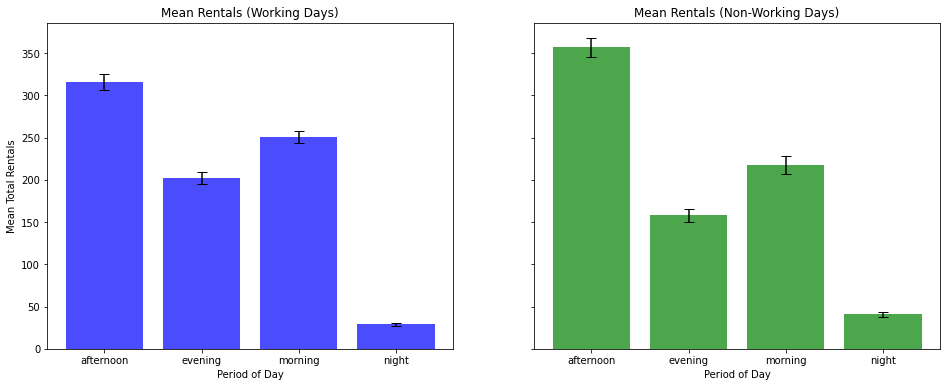

In [52]:
import warnings
warnings.filterwarnings("ignore")

def calculate_stats(group):
    mean = group['count'].mean()
    std = group['count'].std()
    n = group['count'].size
    ci = 1.96 * (std / np.sqrt(n)) if n > 1 else 0 
    return pd.Series({'mean': mean, 'ci': ci})

overall_stats = dataset.groupby('day_period').apply(calculate_stats).reset_index()

working_stats = dataset[dataset['workingday'] == 1].groupby('day_period').apply(calculate_stats).reset_index()
nonworking_stats = dataset[dataset['workingday'] == 0].groupby('day_period').apply(calculate_stats).reset_index()

f, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
# Working Days
ax[0].bar(working_stats['day_period'], working_stats['mean'], yerr=working_stats['ci'], capsize=5, color='blue', alpha=0.7)
ax[0].set_title('Mean Rentals (Working Days)')
ax[0].set_xlabel('Period of Day')
ax[0].set_ylabel('Mean Total Rentals')

# Non-working Days
ax[1].bar(nonworking_stats['day_period'], nonworking_stats['mean'], yerr=nonworking_stats['ci'], capsize=5, color='green', alpha=0.7)
ax[1].set_title('Mean Rentals (Non-Working Days)')
ax[1].set_xlabel('Period of Day')

*  Plot a heatmap for the correlation matrix of the dataset numerical variables. What observations can you make ?

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'temp'),
  Text(1.5, 0, 'atemp'),
  Text(2.5, 0, 'humidity'),
  Text(3.5, 0, 'windspeed'),
  Text(4.5, 0, 'casual'),
  Text(5.5, 0, 'registered'),
  Text(6.5, 0, 'count'),
  Text(7.5, 0, 'year'),
  Text(8.5, 0, 'month'),
  Text(9.5, 0, 'day_of_week'),
  Text(10.5, 0, 'hour')])

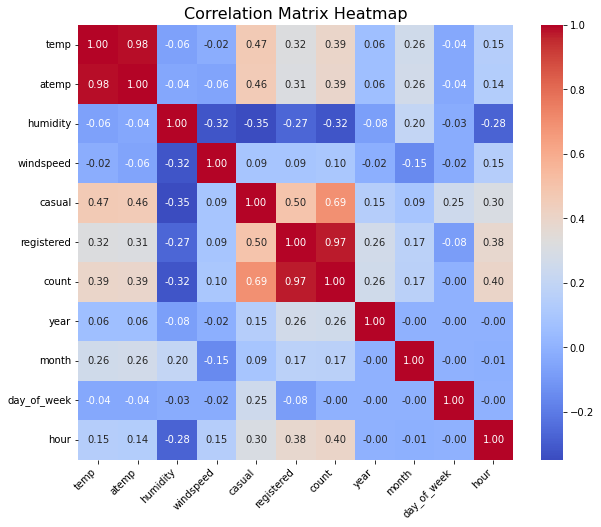

In [55]:
import seaborn as sns

correlation_matrix = dataset[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,            
    cmap='coolwarm',       
    fmt=".2f",             
    cbar=True,             
    square=True            
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')


<p> Observations: </p>
<p> 1- There is a strong positive correlation (0.97) between registered users and total rentals, showing that most rentals come from registered users. </p>
<p> 2- Humidity has a negative correlation (-0.32) with total rentals, meaning rentals decrease when humidity increases. </p>